### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [2]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [5]:
df_c = coffee_red[coffee_red["drinks_coffee"] == True]
df_c.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
685,4611,>=21,True,71.646296


In [6]:
df_nc = coffee_red[coffee_red["drinks_coffee"] == False]
df_nc.head()

,user_id,age,drinks_coffee,height
2167,7441,<21,False,66.659561
1234,8190,<21,False,68.226071
2786,3781,<21,False,69.333116
1253,8059,>=21,False,71.010834
1264,4106,>=21,False,76.194046


In [9]:
sample_size = coffee_red.shape[0]
print("proportion coffee drinkers: {}".format(df_c.shape[0]/sample_size))
print("proportion non-coffee drinkers: {}".format(df_nc.shape[0]/sample_size))

proportion coffee drinkers: 0.595
proportion non-coffee drinkers: 0.405


`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [10]:
df_c.mean()

user_id          5047.378151
drinks_coffee       1.000000
height             68.119630
dtype: float64

In [11]:
df_nc['height'].mean()

66.784922799278775

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [16]:
s2 = coffee_red.sample(200, replace = True)
s2.head()

,user_id,age,drinks_coffee,height
2232,3244,>=21,True,69.824271
1292,6724,>=21,True,66.373129
1543,3708,<21,False,66.322896
1239,4172,>=21,True,71.011189
203,3368,<21,False,69.586635


In [17]:
s2_c_mean = s2['drinks_coffee'].mean()
print("proportion coffee drinkers: {}".format(s2_c_mean))
print("proportion non-coffee drinkers: {}".format(1- s2_c_mean))

proportion coffee drinkers: 0.585
proportion non-coffee drinkers: 0.41500000000000004


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [19]:
import matplotlib.pyplot as plt

% matplotlib inline 

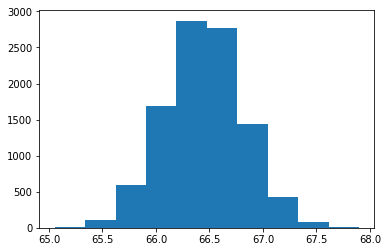

In [22]:
s_height_means = []
for _ in range(10000):
    c = coffee_full.sample(200)
    cm = c[c["drinks_coffee"] == False]["height"].mean()
    s_height_means.append(cm)
    
plt.hist(s_height_means);

In [23]:
np.mean(s_height_means)

66.448297242709558

In [24]:
np.percentile(s_height_means, 2.5), np.percentile(s_height_means, 97.5)

(65.730218388288435, 67.174615774007734)

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [25]:
coffee_full['height'].mean()

67.597486973079342

In [26]:
coffee_full[coffee_full["drinks_coffee"] == False]["height"].mean()

66.443407762147004